# ***HR Analytics***

# ***Problem Statement***

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:



1. They first identify a set of employees based on recommendations/ past performance


2. Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical


3. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

In [26]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

#import required accuracy metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
     

In [138]:

#loading the data set
df = pd.read_csv(r"/content/train.csv")
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [139]:
dft = pd.read_csv(r"/content/test.csv")
dft.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51


In [140]:
ss = pd.read_csv(r"/content/sample_submission_M0L0uXE.csv")
ss.head(2)

,employee_id,is_promoted
0,8724,0
1,74430,0


In [141]:

#lets check the shape 
print('Shape of train dataset:',df.shape)

Shape of train dataset: (54808, 14)


In [142]:

#check the data types
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [143]:
#lets check for Null Values
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [144]:
#Lets replace null values from all missing  numerical columns with the median value of that column

df["previous_year_rating"].fillna(df["previous_year_rating"].median(),inplace=True)

In [145]:
#Lets replace null values from  all missing  Categorical columns with the mean value of that column

df['education'] = df['education'].fillna(df['education'].mode()[0])

In [146]:
#lets check for Null Values

df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [147]:
#Lets check which columns contains '?'
df[df.columns[(df == '?').any()]].nunique()

Series([], dtype: float64)

In [148]:
#Lets chcek the value counts for categorical data
for i in df.columns:
    if df[i].dtypes == 'object':
        print(df[i].value_counts())
        print('---------'*30)

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655

In [149]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [150]:
for col in df.columns:
    print(col,df[col].nunique())
    print('-'*35)

employee_id 54808
-----------------------------------
department 9
-----------------------------------
region 34
-----------------------------------
education 3
-----------------------------------
gender 2
-----------------------------------
recruitment_channel 3
-----------------------------------
no_of_trainings 10
-----------------------------------
age 41
-----------------------------------
previous_year_rating 5
-----------------------------------
length_of_service 35
-----------------------------------
KPIs_met >80% 2
-----------------------------------
awards_won? 2
-----------------------------------
avg_training_score 61
-----------------------------------
is_promoted 2
-----------------------------------


# ***`EDA`***

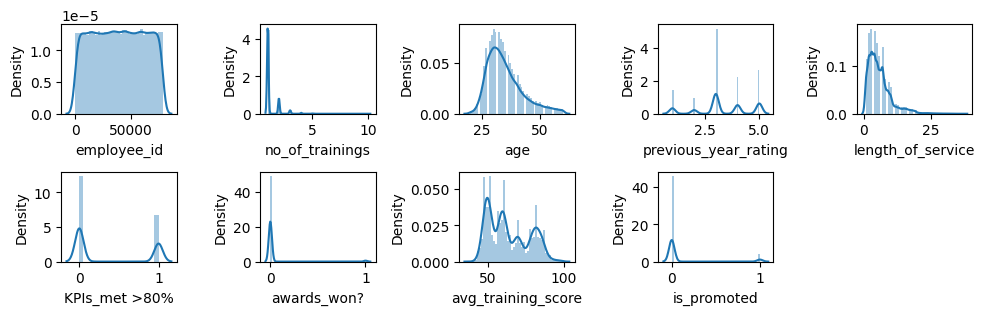

In [156]:
#lets check distribution for continuous columns
num_data = df._get_numeric_data()
plt.figure(figsize = (10,25))
plotnumber = 1
for column in num_data:
    if plotnumber <=10:
        ax = plt.subplot(17,5,plotnumber)
        sns.distplot(num_data[column])
        plt.xlabel(column,fontsize = 10)
    plotnumber+=1
plt.tight_layout()

## ***Check Hit Map to find Corelation ***

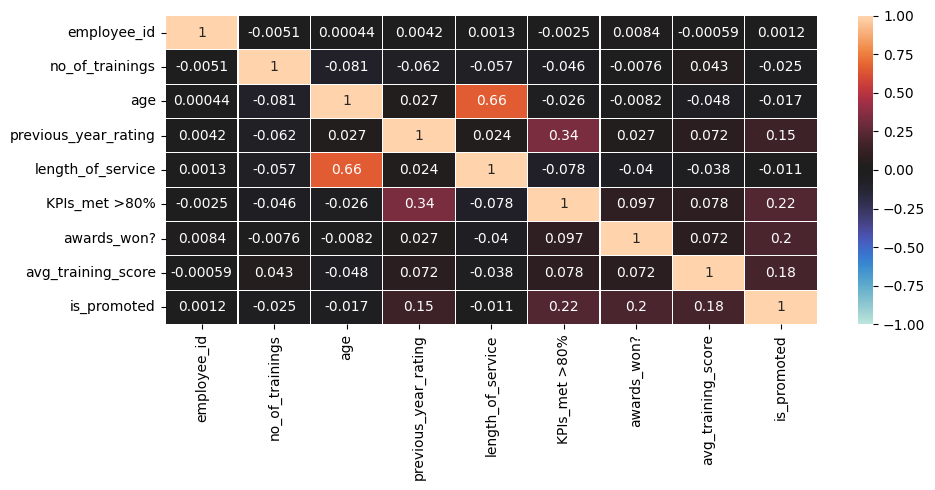

In [157]:

#Lets plot heatmap to check correlation among differnt features and label

df_corr = df.corr()
plt.figure(figsize = (10,5))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

In [158]:
import plotly.express as px

In [242]:
st_con_vt=df[['gender','previous_year_rating','department','is_promoted']]
fig = px.sunburst(st_con_vt, path=['gender','previous_year_rating','department','is_promoted'], values='is_promoted',
                  color='department',
                 color_continuous_scale='viridis_r')
fig.update_layout(title_text='Sunburst Image with gender, department and region')
fig.show()

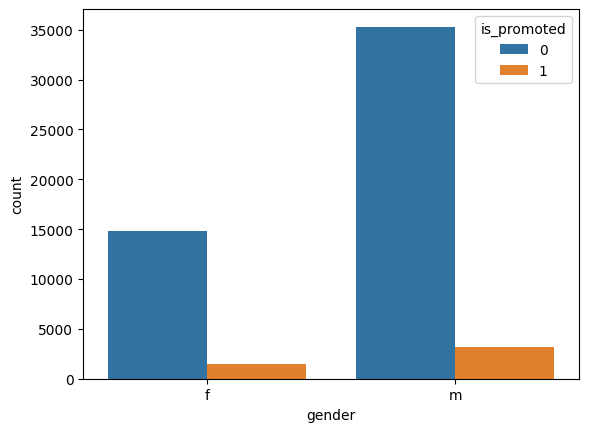

In [197]:
#lets check relation between gender and Loan_Status
sns.countplot(x = 'gender', hue = 'is_promoted', data = df)
plt.show()

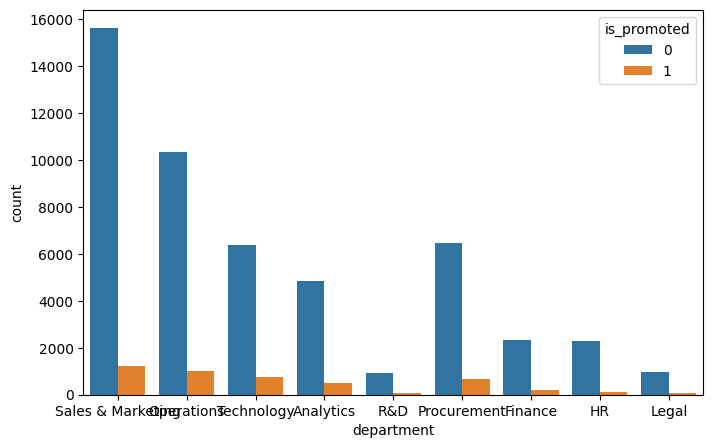

In [198]:
#lets check the fraud_report based on age
plt.figure(figsize = (8,5))
sns.countplot(x = 'department', hue = 'is_promoted', data = df)
plt.show()

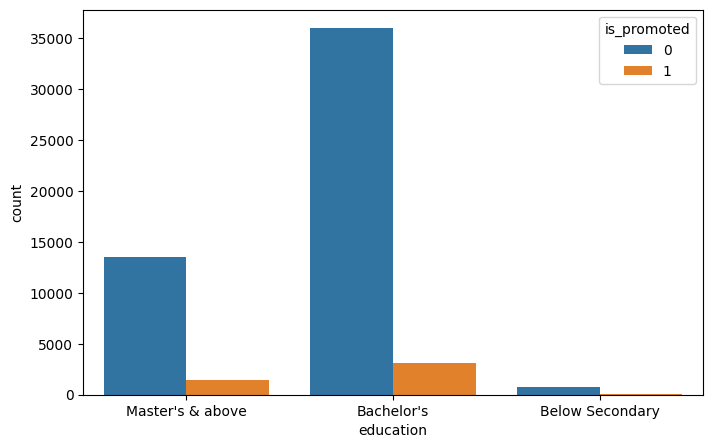

In [200]:
#lets check the fraud_report based on age
plt.figure(figsize = (8,5))
sns.countplot(x = 'education', hue = 'is_promoted', data = df)
plt.show()

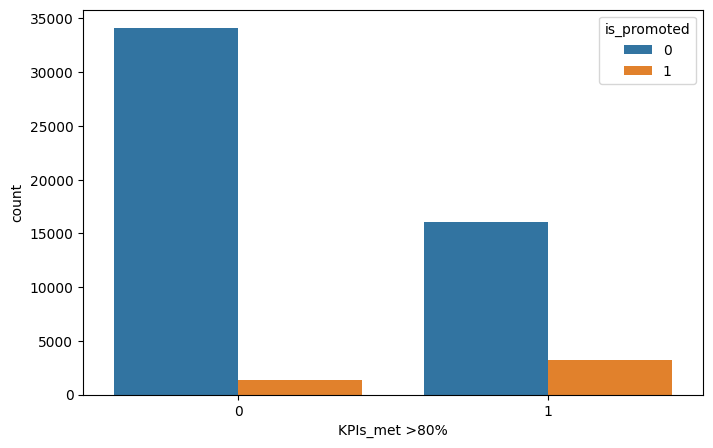

In [202]:
#lets check the fraud_report based on age
plt.figure(figsize = (8,5))
sns.countplot(x = 'KPIs_met >80%', hue = 'is_promoted', data = df)
plt.show()

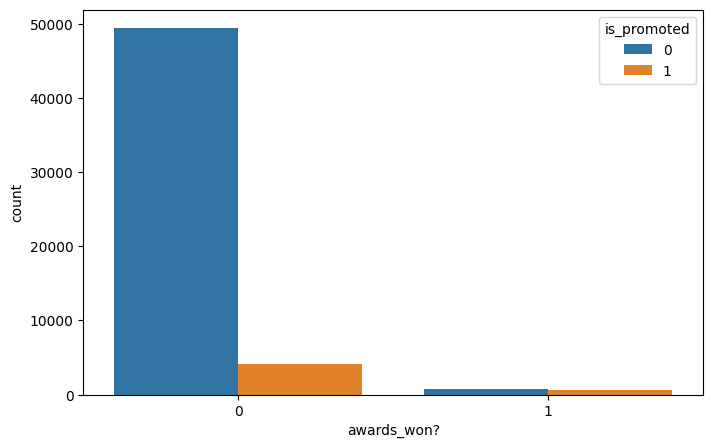

In [201]:
#lets check the fraud_report based on age
plt.figure(figsize = (8,5))
sns.countplot(x = 'awards_won?', hue = 'is_promoted', data = df)
plt.show()

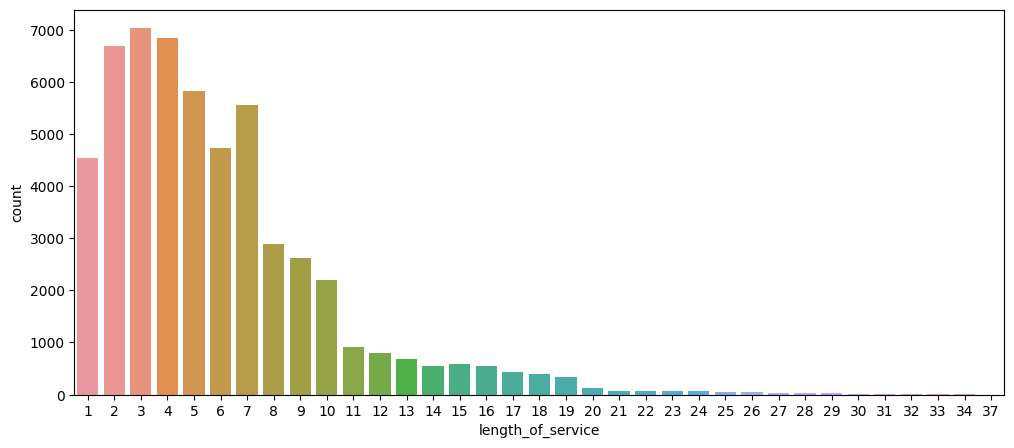

In [217]:
#lets check the fraud_report based on age
plt.figure(figsize = (12,5))
sns.countplot(x = 'length_of_service', data = df)
plt.show()

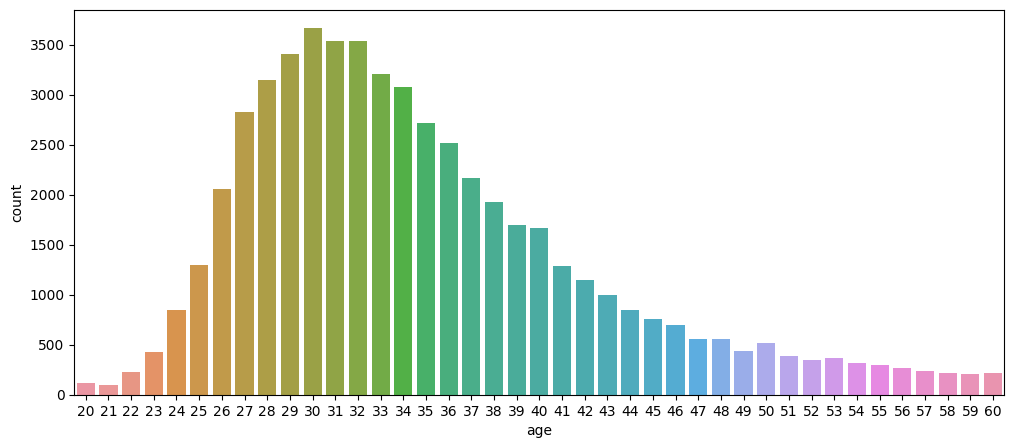

In [216]:
#lets check the fraud_report based on age
plt.figure(figsize = (12,5))
sns.countplot(x = 'age', data = df)
plt.show()

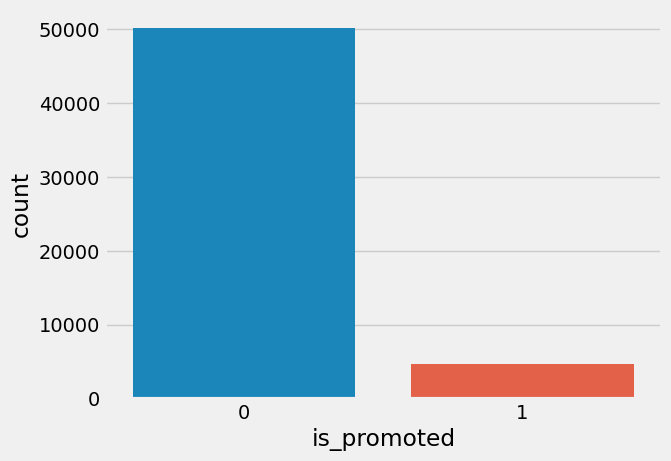

In [205]:
#lets check counts for Education
plt.style.use('fivethirtyeight')
sns.countplot(x = 'is_promoted', data = df)
plt.show()

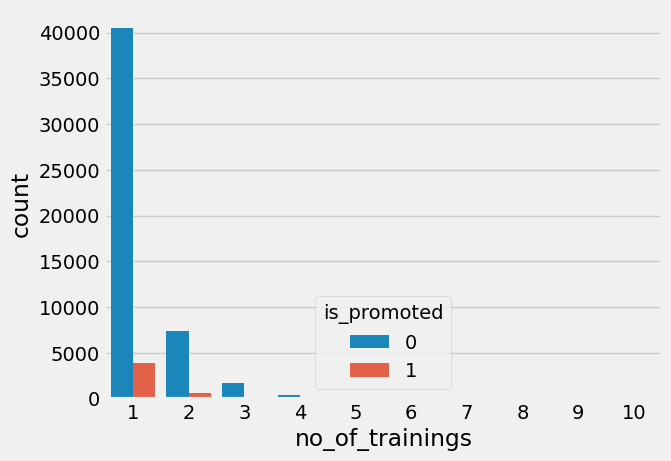

In [206]:
#check the relation between column Education and Loan Status
sns.countplot(x = 'no_of_trainings', hue = 'is_promoted', data = df)
plt.show()

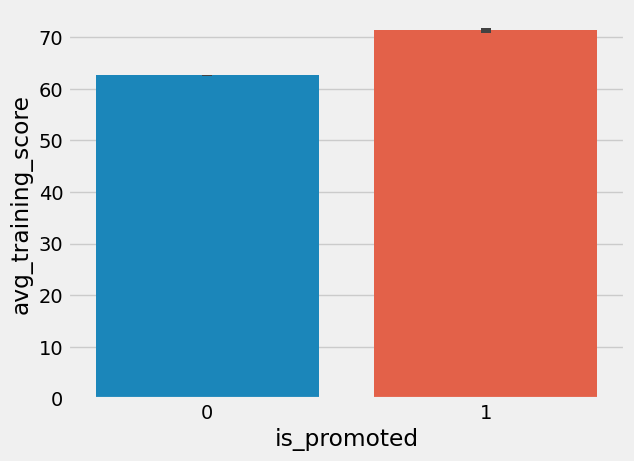

In [207]:
#lets plot barplot for MonthlyCharges vs churn
sns.barplot(x = 'is_promoted', y = 'avg_training_score', data = df)
plt.show()

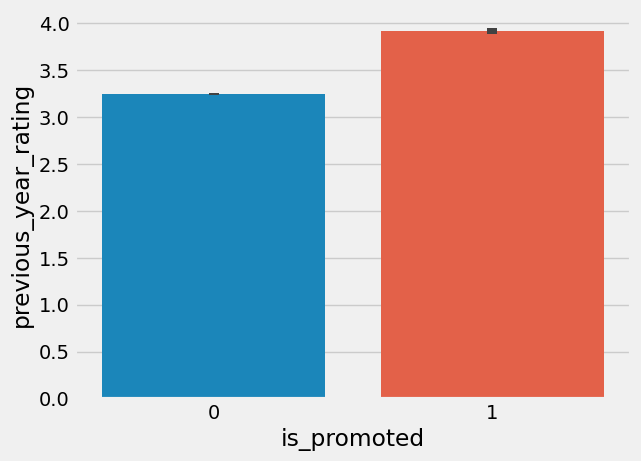

In [208]:
#lets plot barplot for MonthlyCharges vs churn
sns.barplot(x = 'is_promoted', y = 'previous_year_rating', data = df)
plt.show()

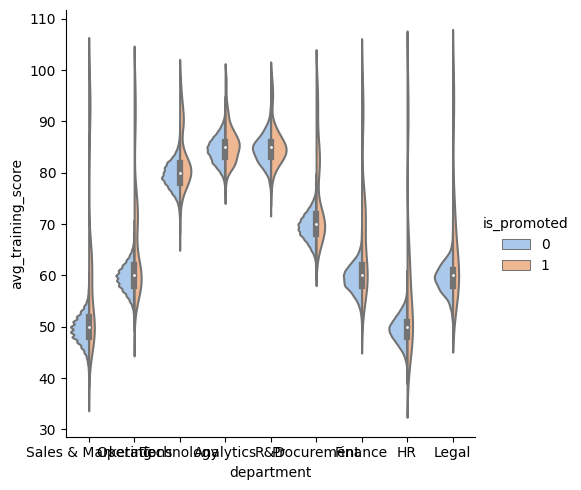

In [222]:
#lets check the relation between Dependents, TotalCharges, churn using Violin plot

plt.style.use('default')
sns.catplot(x="department", y="avg_training_score", hue="is_promoted",
            kind="violin", split=True,
            palette="pastel", data=df)
plt.show()

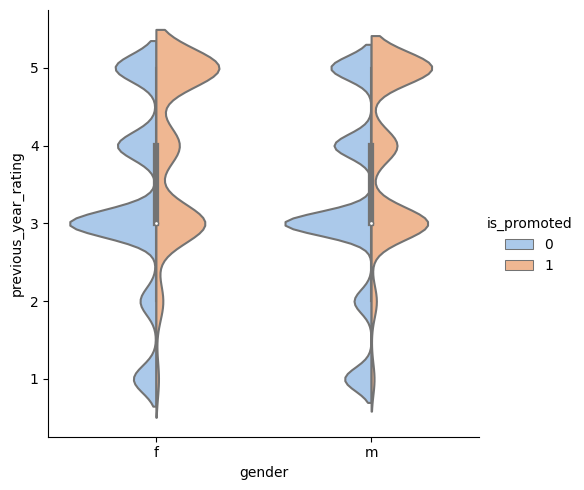

In [213]:
#lets check the relation between Dependents, TotalCharges, churn using Violin plot
plt.style.use('default')
sns.catplot(x="gender", y="previous_year_rating", hue="is_promoted",
            kind="violin", split=True,
            palette="pastel", data=df)
plt.show()

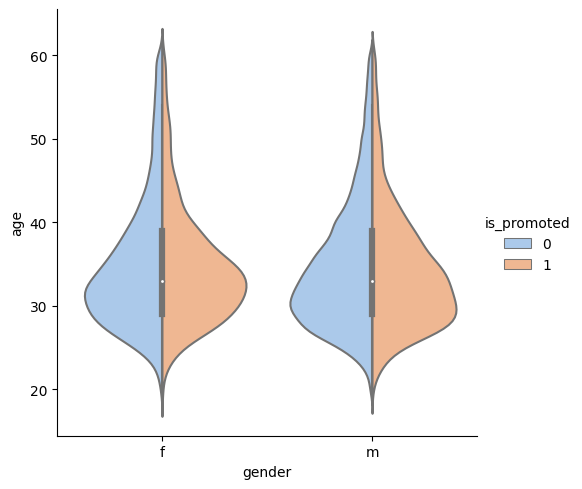

In [225]:
#lets check the relation between Dependents, TotalCharges, churn using Violin plot
plt.style.use('default')
sns.catplot(x="gender", y="age", hue="is_promoted",
            kind="violin", split=True,
            palette="pastel", data=df)
plt.show()

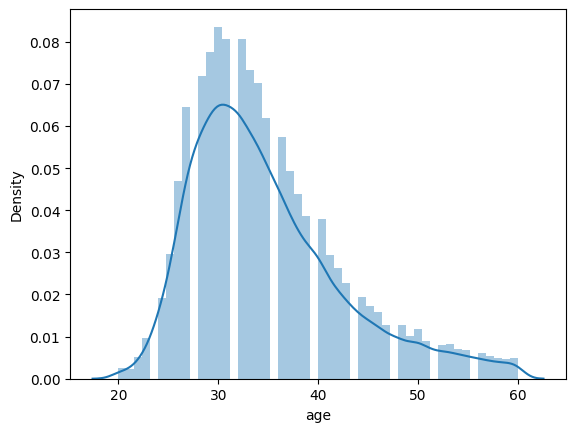

In [226]:
#lets have a look at destribution of Loan_Amount_Term
sns.distplot(df['age'])
plt.show()

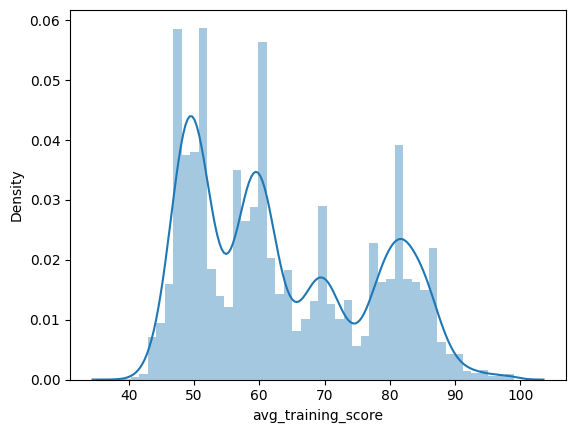

In [229]:
#lets have a look at destribution of Loan_Amount_Term
sns.distplot(df['avg_training_score'])
plt.show()

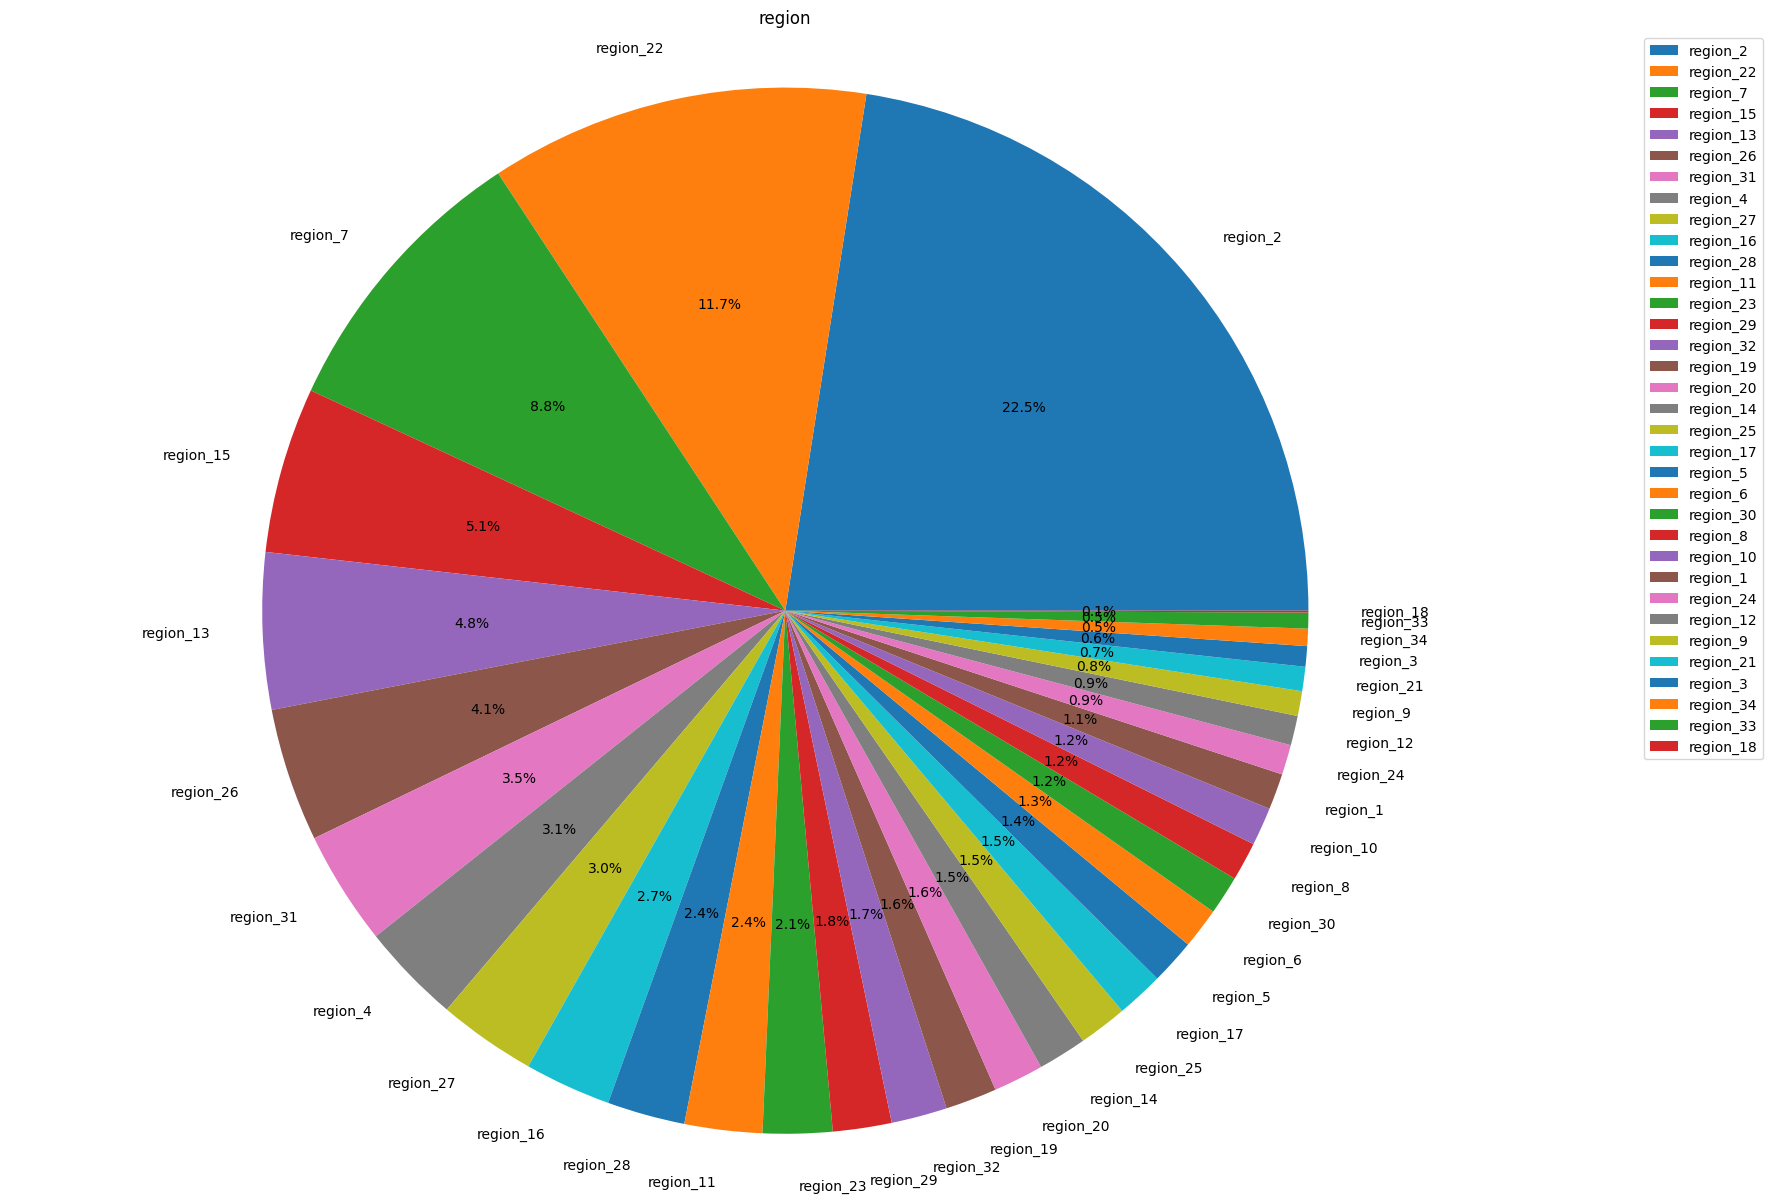

In [233]:
#Lets have a look on loan_status_relationship, how it is distributed

plt.figure(figsize=(20, 15))
plt.pie( df["region"].value_counts().values, labels = df["region"].value_counts().index, autopct='%1.1f%%')
fig = plt.gcf()
plt.title('region')
plt.axis('equal')
plt.legend(prop={'size': 20})
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

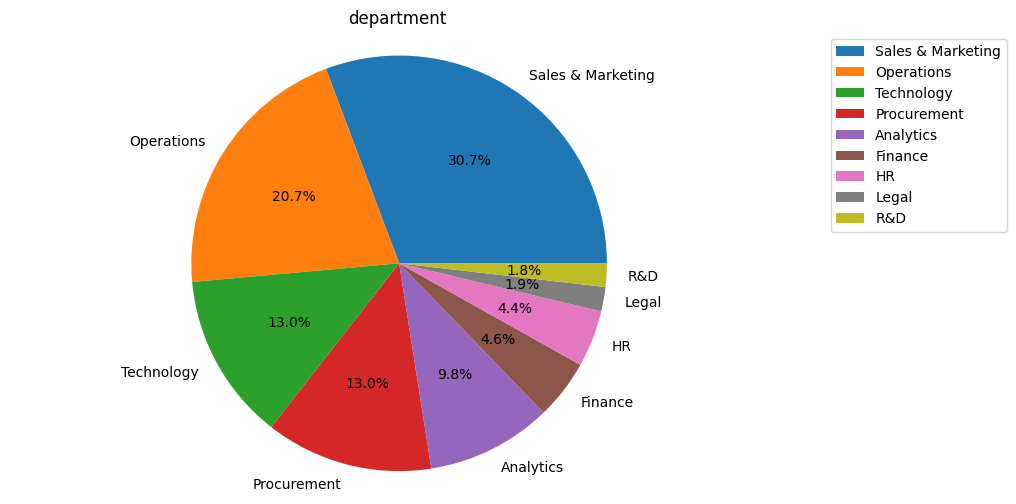

In [235]:
#Lets have a look on loan_status_relationship, how it is distributed

plt.figure(figsize=(10, 6))
plt.pie( df["department"].value_counts().values, labels = df["department"].value_counts().index, autopct='%1.1f%%')
fig = plt.gcf()
plt.title('department')
plt.axis('equal')
plt.legend(prop={'size': 20})
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

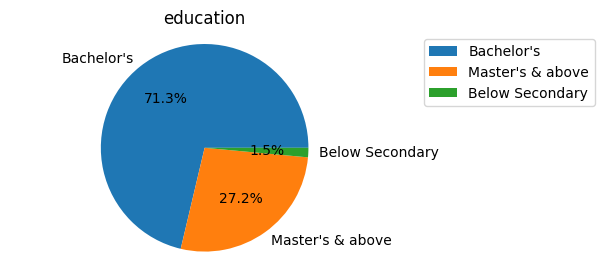

In [238]:
#Lets have a look on loan_status_relationship, how it is distributed

plt.figure(figsize=(5, 3))
plt.pie( df["education"].value_counts().values, labels = df["education"].value_counts().index, autopct='%1.1f%%')
fig = plt.gcf()
plt.title('education')
plt.axis('equal')
plt.legend(prop={'size': 20})
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

## **Pre-Processing**

In [22]:

#lets describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,54808.0,3.304481,1.214770,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


## `***Checking for outliers using box plots***`

In [40]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

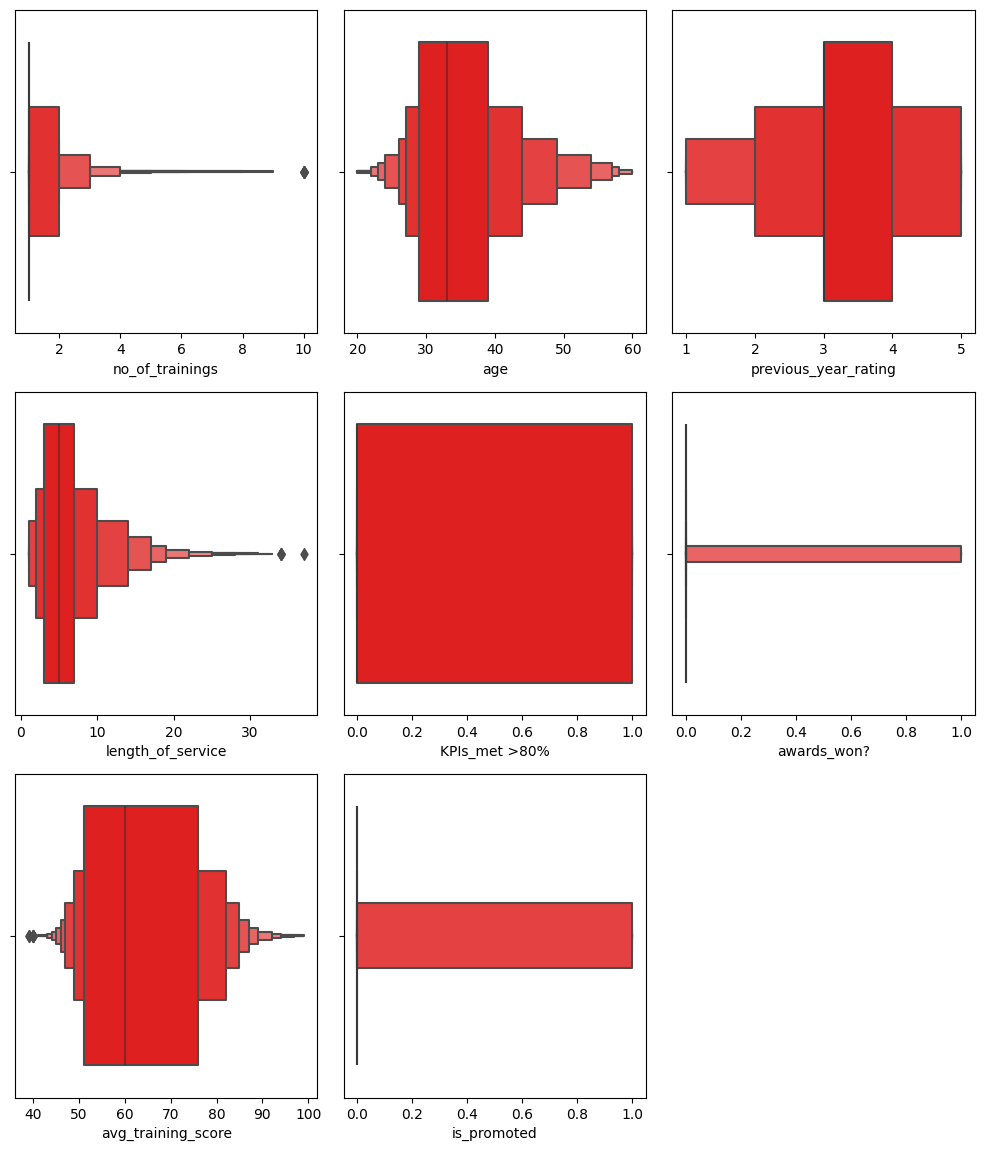

In [41]:

#Lets have a look on distribution of our data
cols=['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score','is_promoted']
plt.style.use('default')
plt.figure(figsize = (10,15))
plotnumber = 1
for column in cols:
    if plotnumber <=15:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxenplot(df[column], color="red")
        #plt.title(f"Distribution of {column}",fontsize=10)
        plt.xlabel(column,fontsize = 10)
    plotnumber+=1
plt.tight_layout()

# get dummies

In [46]:
df= pd.get_dummies(df, columns=['department','education','gender','recruitment_channel','previous_year_rating','KPIs_met >80%','awards_won?'],drop_first=True)


In [47]:
df.nunique()

employee_id                     54808
region                             34
no_of_trainings                    10
age                                41
length_of_service                  35
avg_training_score                 61
is_promoted                         2
department_Finance                  2
department_HR                       2
department_Legal                    2
department_Operations               2
department_Procurement              2
department_R&D                      2
department_Sales & Marketing        2
department_Technology               2
education_Below Secondary           2
education_Master's & above          2
gender_m                            2
recruitment_channel_referred        2
recruitment_channel_sourcing        2
previous_year_rating_2.0            2
previous_year_rating_3.0            2
previous_year_rating_4.0            2
previous_year_rating_5.0            2
KPIs_met >80%_1                     2
awards_won?_1                       2
dtype: int64

In [48]:
df.dtypes

employee_id                      int64
region                          object
no_of_trainings                  int64
age                              int64
length_of_service                int64
avg_training_score               int64
is_promoted                      int64
department_Finance               uint8
department_HR                    uint8
department_Legal                 uint8
department_Operations            uint8
department_Procurement           uint8
department_R&D                   uint8
department_Sales & Marketing     uint8
department_Technology            uint8
education_Below Secondary        uint8
education_Master's & above       uint8
gender_m                         uint8
recruitment_channel_referred     uint8
recruitment_channel_sourcing     uint8
previous_year_rating_2.0         uint8
previous_year_rating_3.0         uint8
previous_year_rating_4.0         uint8
previous_year_rating_5.0         uint8
KPIs_met >80%_1                  uint8
awards_won?_1            

In [49]:
df.isna().sum()

employee_id                     0
region                          0
no_of_trainings                 0
age                             0
length_of_service               0
avg_training_score              0
is_promoted                     0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
education_Below Secondary       0
education_Master's & above      0
gender_m                        0
recruitment_channel_referred    0
recruitment_channel_sourcing    0
previous_year_rating_2.0        0
previous_year_rating_3.0        0
previous_year_rating_4.0        0
previous_year_rating_5.0        0
KPIs_met >80%_1                 0
awards_won?_1                   0
dtype: int64

In [50]:
df.head(6)

,employee_id,region,no_of_trainings,age,length_of_service,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,...,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_1,awards_won?_1
0,65438,region_7,1,35,8,49,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
1,65141,region_22,1,30,4,60,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,7513,region_19,1,34,7,50,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
3,2542,region_23,2,39,10,50,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,48945,region_26,1,45,2,73,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5,58896,region_2,2,31,7,85,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [51]:
display(df.drop_duplicates())

,employee_id,region,no_of_trainings,age,length_of_service,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,...,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_1,awards_won?_1
0,65438,region_7,1,35,8,49,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
1,65141,region_22,1,30,4,60,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,7513,region_19,1,34,7,50,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
3,2542,region_23,2,39,10,50,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,48945,region_26,1,45,2,73,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,region_14,1,48,17,78,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
54804,74592,region_27,1,37,6,56,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
54805,13918,region_1,1,27,3,79,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
54806,13614,region_9,1,29,2,45,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


## **Split Data into x & y**

In [53]:

#lets saperate data into label and features
x = df.drop(columns = 'is_promoted')
y = df["is_promoted"]

In [54]:
x.skew()

employee_id                    -0.003128
no_of_trainings                 3.445434
age                             1.007432
length_of_service               1.738061
avg_training_score              0.451908
department_Finance              4.319899
department_HR                   4.440034
department_Legal                7.054982
department_Operations           1.446021
department_Procurement          2.197349
department_R&D                  7.203074
department_Sales & Marketing    0.835584
department_Technology           2.197349
education_Below Secondary       8.068639
education_Master's & above      1.022988
gender_m                       -0.885300
recruitment_channel_referred    6.709451
recruitment_channel_sourcing    0.308988
previous_year_rating_2.0        3.171180
previous_year_rating_3.0        0.345285
previous_year_rating_4.0        1.664041
previous_year_rating_5.0        1.393131
KPIs_met >80%_1                 0.619909
awards_won?_1                   6.338914
dtype: float64

In [55]:
#Lets treat the skewness

for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
        if x.skew().loc[index]<-0.5:
            x[index]=np.square(x[index])

In [56]:
x.skew()

employee_id                    -0.003128
no_of_trainings                 2.292700
age                             0.496626
length_of_service               0.055984
avg_training_score              0.451908
department_Finance                   inf
department_HR                        inf
department_Legal                     inf
department_Operations                inf
department_Procurement               inf
department_R&D                       inf
department_Sales & Marketing         inf
department_Technology                inf
education_Below Secondary            inf
education_Master's & above           inf
gender_m                       -0.885300
recruitment_channel_referred         inf
recruitment_channel_sourcing    0.308988
previous_year_rating_2.0             inf
previous_year_rating_3.0        0.345285
previous_year_rating_4.0             inf
previous_year_rating_5.0             inf
KPIs_met >80%_1                      inf
awards_won?_1                        inf
dtype: float64

In [57]:
num_data = x.select_dtypes(include = [np.number])
cat_data = x.select_dtypes(exclude=[np.number])

In [58]:
num_data.head(3)

,employee_id,no_of_trainings,age,length_of_service,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_1,awards_won?_1
0,65438,0.693147,3.583519,2.197225,49,0.0,0.0,0.0,0.000000,0.0,...,0.693359,0,0.0,1,0.0,0,0.0,0.693359,0.693359,0.0
1,65141,0.693147,3.433987,1.609438,60,0.0,0.0,0.0,0.693359,0.0,...,0.000000,1,0.0,0,0.0,0,0.0,0.693359,0.000000,0.0
2,7513,0.693147,3.555348,2.079442,50,0.0,0.0,0.0,0.000000,0.0,...,0.000000,1,0.0,1,0.0,1,0.0,0.000000,0.000000,0.0


In [59]:
cat_data.head(3)

,region
0,region_7
1,region_22
2,region_19


## Applying standard scaler to numerical data

In [60]:
#Lets bring all numerical features to common scale by applying standard scaler

scaler = StandardScaler()
num = scaler.fit_transform(num_data)
num = pd.DataFrame(num,columns=num_data.columns)

In [61]:
num.head(4)

,employee_id,no_of_trainings,age,length_of_service,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_1,awards_won?_1
0,1.161858,-0.451138,0.131451,0.757069,-1.075931,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,...,1.634695,-1.536223,-0.145876,1.166353,-0.289009,-0.842155,-0.468856,1.915225,1.356878,-0.154018
1,1.148709,-0.451138,-0.607976,-0.256764,-0.253282,-0.220262,-0.214834,-0.139009,1.956975,-0.38696,...,-0.611735,0.650947,-0.145876,-0.857373,-0.289009,-0.842155,-0.468856,1.915225,-0.736986,-0.154018
2,-1.402741,-0.451138,-0.007853,0.553913,-1.001145,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,...,-0.611735,0.650947,-0.145876,1.166353,-0.289009,1.187430,-0.468856,-0.522132,-0.736986,-0.154018
3,-1.622829,1.501338,0.652453,1.103192,-1.001145,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,...,-0.611735,0.650947,-0.145876,-0.857373,-0.289009,-0.842155,-0.468856,-0.522132,-0.736986,-0.154018


## Encoding

In [62]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in cat_data.columns:
    cat_data[i] = enc.fit_transform(cat_data[i].values.reshape(-1,1))
     

In [63]:
cat_data.head(4)

,region
0,31.0
1,14.0
2,10.0
3,15.0


## **combining categorical and numerical data**

In [64]:

X = pd.concat([num, cat_data], axis = 1)

In [65]:
X.head(6)

,employee_id,no_of_trainings,age,length_of_service,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_1,awards_won?_1,region
0,1.161858,-0.451138,0.131451,0.757069,-1.075931,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,...,-1.536223,-0.145876,1.166353,-0.289009,-0.842155,-0.468856,1.915225,1.356878,-0.154018,31.0
1,1.148709,-0.451138,-0.607976,-0.256764,-0.253282,-0.220262,-0.214834,-0.139009,1.956975,-0.38696,...,0.650947,-0.145876,-0.857373,-0.289009,-0.842155,-0.468856,1.915225,-0.736986,-0.154018,14.0
2,-1.402741,-0.451138,-0.007853,0.553913,-1.001145,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,...,0.650947,-0.145876,1.166353,-0.289009,1.187430,-0.468856,-0.522132,-0.736986,-0.154018,10.0
3,-1.622829,1.501338,0.652453,1.103192,-1.001145,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,...,0.650947,-0.145876,-0.857373,-0.289009,-0.842155,-0.468856,-0.522132,-0.736986,-0.154018,15.0
4,0.431639,-0.451138,1.343568,-1.137853,0.718939,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,...,0.650947,-0.145876,-0.857373,-0.289009,1.187430,-0.468856,-0.522132,-0.736986,-0.154018,18.0
5,0.872215,1.501338,-0.450980,0.553913,1.616374,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,...,0.650947,-0.145876,1.166353,-0.289009,1.187430,-0.468856,-0.522132,-0.736986,-0.154018,11.0


In [68]:

#check the shape
X.shape

(54808, 25)

In [69]:

#check value count for target variable
y.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

# Over sampling

In [70]:

#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(X,y)

In [71]:
#lets check the count of target variable now
y_over.value_counts()

0    50140
1    50140
Name: is_promoted, dtype: int64

## **Finding best random_state**

In [72]:

#Lets find the best random state using LogisticRegression
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(50,100):
    x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.8114878340646191 on Random State 93


In [73]:

#lets split our data into train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 93)

## **Model Building with Evaluation Metrics**

# **LogisticRegression model**

In [74]:
#Lets check the model with LogisticRegression
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
accuracy = accuracy_score(y_test,predlr)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,predlr)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,predlr)}")

#cross validation score
scores = cross_val_score(LR, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 81.14878340646192
roc_auc_score: 81.12711722703277
---------------------------------------------------
Confusion Matrix : 
 [[ 9686  2768]
 [ 1958 10658]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.83      0.78      0.80     12454
           1       0.79      0.84      0.82     12616

    accuracy                           0.81     25070
   macro avg       0.81      0.81      0.81     25070
weighted avg       0.81      0.81      0.81     25070


Cross validation score : 80.70203430394895

Accuracy Score - Cross Validation Score : 0.4467491025129675


## **DecisionTreeClassifier model**

In [75]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
accuracy = accuracy_score(y_test,pred_dt)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_dt)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

#cross validation score
scores = cross_val_score(dt, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)
     

Accuracy Score: 93.60191463901077
roc_auc_score: 93.59948223921864
---------------------------------------------------
Confusion Matrix : 
 [[11610   844]
 [  760 11856]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94     12454
           1       0.93      0.94      0.94     12616

    accuracy                           0.94     25070
   macro avg       0.94      0.94      0.94     25070
weighted avg       0.94      0.94      0.94     25070


Cross validation score : 93.3266852812126


Accuracy Score - Cross Validation Score : 0.2752293577981675


## RandomForestClassifier model

In [87]:
#model with RandomForestClassifier


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
pred_rf = model.predict(x_test)
accuracy = accuracy_score(y_test,pred_rf)*100

print(f"Accuracy Score:", accuracy)
print(f"\nroc_auc_score: {roc_auc_score(y_test,pred_rf)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

#cross validation score
scores = cross_val_score(model, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 96.6733147187874

roc_auc_score: 96.67730004819765
---------------------------------------------------
Confusion Matrix : 
 [[12117   337]
 [  497 12119]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     12454
           1       0.97      0.96      0.97     12616

    accuracy                           0.97     25070
   macro avg       0.97      0.97      0.97     25070
weighted avg       0.97      0.97      0.97     25070


Cross validation score : 96.53071400079776


Accuracy Score - Cross Validation Score : 0.14260071798963736


## **KNeighborsClassifier model**

In [78]:
#model with KNeighborsClassifier


from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn = kn.predict(x_test)
accuracy = accuracy_score(y_test,pred_kn)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_kn)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_kn)}")

#cross validation score
scores = cross_val_score(kn, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 89.48942959712805
roc_auc_score: 89.42529688709111
---------------------------------------------------
Confusion Matrix : 
 [[ 9901  2553]
 [   82 12534]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.99      0.80      0.88     12454
           1       0.83      0.99      0.90     12616

    accuracy                           0.89     25070
   macro avg       0.91      0.89      0.89     25070
weighted avg       0.91      0.89      0.89     25070


Cross validation score : 89.62504986039092


Accuracy Score - Cross Validation Score : -0.13562026326286514


## **XGBClassifier model**

In [79]:
#lets check with XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier(verbosity = 0)
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_xgb)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_xgb)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_xgb)}")

#cross validation score
scores = cross_val_score(xgb, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 90.45871559633028
roc_auc_score: 90.44254193415281
---------------------------------------------------
Confusion Matrix : 
 [[10952  1502]
 [  890 11726]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90     12454
           1       0.89      0.93      0.91     12616

    accuracy                           0.90     25070
   macro avg       0.91      0.90      0.90     25070
weighted avg       0.91      0.90      0.90     25070


Cross validation score : 90.58436378141204

Accuracy Score - Cross Validation Score : -0.1256481850817579


## **ExtraTreesClassifier model**

In [80]:
#lets check with Extra Trees Classifier


from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier()
ext.fit(x_train,y_train)
pred_ext = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_ext)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_ext)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_ext)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_ext)}")

#cross validation score
scores = cross_val_score(ext, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 90.45871559633028
roc_auc_score: 90.44254193415281
---------------------------------------------------
Confusion Matrix : 
 [[10952  1502]
 [  890 11726]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90     12454
           1       0.89      0.93      0.91     12616

    accuracy                           0.90     25070
   macro avg       0.91      0.90      0.90     25070
weighted avg       0.91      0.90      0.90     25070


Cross validation score : 97.1230554447547

Accuracy Score - Cross Validation Score : -6.664339848424419


## AUC & ROC Curve

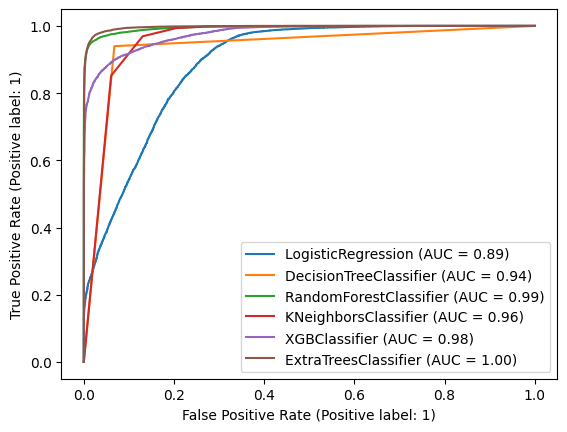

<Figure size 2500x2500 with 0 Axes>

In [81]:

#Lets plot roc curve and check auc and performance of all algorithms


from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(dt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(kn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(xgb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(ext, x_test, y_test, ax = disp.ax_)
plt.figure(figsize = (25,25))
plt.show()

## **Hyperparameter Tuning**

In [82]:

#lets selects different parameters for tuning


grid_params = {
               'criterion':['gini','entropy'],
                'max_depth': [10,12,15,20,22],
                'n_estimators':[500,700,1000,1200],
                'max_features':['aoto','sqrt','log2'],
                'min_samples_split': [2]
                }

In [85]:

#train the model with given parameters using GridSearchCV


#GCV =  GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)
#GCV.fit(x_train,y_train)
     

In [86]:
#GCV.best_params_ 

#printing the best parameters found by GridSearchCV

In [ ]:
#lets check the results of final model with best parameters


model = RandomForestClassifier(criterion = 'gini', max_depth = 22, min_samples_split = 2,  n_estimators = 1200)
model.fit(x_train,y_train)
pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("-----------------------------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,pred)*100}%")
print("------------------------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("------------------------------------------------------------------------")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

## **AUC ROC CURVE for final model**

In [ ]:
plot_roc_curve(model, x_test, y_test)
plt.title('ROC Curve for best model')
plt.show()

# ***Test_Data_Set***

In [108]:

test = pd.read_csv('/content/test.csv')
test.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [109]:
L_ID = test['employee_id']
#test = test.drop(columns='employee_id')

In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [111]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

filling null values

In [112]:
#Lets replace null values from all missing  numerical columns with the median value of that column

test["previous_year_rating"].fillna(test["previous_year_rating"].median(),inplace=True)

In [113]:
#Lets replace null values from  all missing  Categorical columns with the mean value of that column

test['education'] = test['education'].fillna(test['education'].mode()[0])

In [114]:
test.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

***get dummies***

In [115]:
test= pd.get_dummies(test, columns=['department','education','gender','recruitment_channel','previous_year_rating','KPIs_met >80%','awards_won?'],drop_first=True)


In [116]:
test.skew()

employee_id                     0.007315
no_of_trainings                 3.299829
age                             1.011777
length_of_service               1.703001
avg_training_score              0.458113
department_Finance              4.310660
department_HR                   4.324417
department_Legal                7.057775
department_Operations           1.478315
department_Procurement          2.219529
department_R&D                  7.100133
department_Sales & Marketing    0.814577
department_Technology           2.224647
education_Below Secondary       7.735070
education_Master's & above      0.997324
gender_m                       -0.907093
recruitment_channel_referred    7.007860
recruitment_channel_sourcing    0.307375
previous_year_rating_2.0        3.263603
previous_year_rating_3.0        0.347777
previous_year_rating_4.0        1.658174
previous_year_rating_5.0        1.373299
KPIs_met >80%_1                 0.588650
awards_won?_1                   6.398053
dtype: float64

In [117]:
#Lets treat the skewness

for index in test.skew().index:
    if test.skew().loc[index]>0.5:
        test[index]=np.log1p(test[index])
        if test.skew().loc[index]<-0.5:
            test[index]=np.square(test[index])

In [118]:
test.skew()

employee_id                     0.007315
no_of_trainings                 2.236748
age                             0.500978
length_of_service               0.053571
avg_training_score              0.458113
department_Finance                   inf
department_HR                        inf
department_Legal                     inf
department_Operations                inf
department_Procurement               inf
department_R&D                       inf
department_Sales & Marketing         inf
department_Technology                inf
education_Below Secondary            inf
education_Master's & above           inf
gender_m                       -0.907093
recruitment_channel_referred         inf
recruitment_channel_sourcing    0.307375
previous_year_rating_2.0             inf
previous_year_rating_3.0        0.347777
previous_year_rating_4.0             inf
previous_year_rating_5.0             inf
KPIs_met >80%_1                      inf
awards_won?_1                        inf
dtype: float64

In [119]:
num_data2 = test.select_dtypes(include = [np.number])
cat_data2 = test.select_dtypes(exclude=[np.number])

In [120]:
#Lets bring all numerical features to common scale by applying standard scaler

scaler = StandardScaler()
num2 = scaler.fit_transform(num_data2)
num2 = pd.DataFrame(num2,columns=num_data2.columns)

In [121]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in cat_data2.columns:
    cat_data2[i] = enc.fit_transform(cat_data2[i].values.reshape(-1,1))
     

In [122]:
test = pd.concat([num2, cat_data2], axis = 1)

In [123]:
test.shape

(23490, 25)

In [124]:
X.shape

(54808, 25)

In [125]:
test.columns

Index(['employee_id', 'no_of_trainings', 'age', 'length_of_service',
       'avg_training_score', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'education_Below Secondary',
       'education_Master's & above', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'previous_year_rating_2.0', 'previous_year_rating_3.0',
       'previous_year_rating_4.0', 'previous_year_rating_5.0',
       'KPIs_met >80%_1', 'awards_won?_1', 'region'],
      dtype='object')

In [126]:
X.columns

Index(['employee_id', 'no_of_trainings', 'age', 'length_of_service',
       'avg_training_score', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'education_Below Secondary',
       'education_Master's & above', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'previous_year_rating_2.0', 'previous_year_rating_3.0',
       'previous_year_rating_4.0', 'previous_year_rating_5.0',
       'KPIs_met >80%_1', 'awards_won?_1', 'region'],
      dtype='object')

In [127]:

#lets predict the price with our best model
prediction = model.predict(test)

In [128]:

prediction

array([1, 0, 0, ..., 0, 0, 1])

In [130]:

#lets make the dataframe for prediction
hr = pd.DataFrame(prediction, columns=["is_promoted"])

In [131]:

HR_file = pd.concat([L_ID, hr], axis = 1)

In [132]:
#Lets save the submission to csv

HR_file.to_csv("HR_ Analysis.csv",index=False)

In [136]:
HR_file.head(5)

,employee_id,is_promoted
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [134]:
HR_file.shape

(23490, 2)

In [135]:
ss.shape

(23490, 2)

## `***THANK YOU***`